In [185]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

from pycaret.regression import setup, create_model, tune_model, evaluate_model, predict_model


import warnings
warnings.filterwarnings("ignore")

In [186]:
# Load the dataset
df = pd.read_csv('../data/processed/additional_data.csv')
df


,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta 1,exterior,3,118.0,True,True,Chopera,Arganzuela
1,485000,planta 2,exterior,2,82.0,True,True,Palos de Moguer,Arganzuela
2,315000,planta 2,exterior,2,72.0,False,False,Legazpi,Arganzuela
3,585000,planta 4,exterior,2,174.0,True,True,Palos de Moguer,Arganzuela
4,255000,bajo,exterior,3,75.0,False,False,Acacias,Arganzuela
...,...,...,...,...,...,...,...,...,...
15970,155000,planta 3,exterior,4,106.0,False,False,Villaverde Alto,villaverde
15971,108000,planta 3,exterior,3,60.0,False,False,San CristÃ³bal,villaverde
15972,140000,bajo,exterior,2,65.0,False,False,San CristÃ³bal,villaverde
15973,135000,planta 1,exterior,2,71.0,False,False,Los Rosales,villaverde


In [187]:
df.elevator.value_counts(), df.garage.value_counts()

(elevator
 True     11378
 False     4597
 Name: count, dtype: int64,
 garage
 False    11528
 True      4447
 Name: count, dtype: int64)

In [188]:
df['elevator'] = df['elevator'].astype(int)
df['garage'] = df['garage'].astype(int)
df.elevator.value_counts(), df.garage.value_counts()

(elevator
 1    11378
 0     4597
 Name: count, dtype: int64,
 garage
 0    11528
 1     4447
 Name: count, dtype: int64)

In [189]:
df.house_type_2.value_counts()

house_type_2
exterior    13821
interior     1685
Name: count, dtype: int64

In [190]:
#df['house_type_2'] = df['house_type_2'].replace({'exterior': 1, 'interior': 0})
df.drop(columns='house_type_2',inplace=True)
#df.house_type_2.value_counts()

In [191]:
df.describe()

,price,rooms,m2,elevator,garage
count,1.597500e+04,15975.000000,15975.000000,15975.000000,15975.000000
mean,6.242327e+05,2.847762,124.807398,0.712238,0.278372
std,7.709074e+05,1.360926,101.705064,0.452734,0.448212
min,7.250000e+02,1.000000,1.000000,0.000000,0.000000
25%,1.950000e+05,2.000000,66.000000,0.000000,0.000000
50%,3.599730e+05,3.000000,93.000000,1.000000,0.000000
75%,7.490000e+05,3.000000,142.000000,1.000000,1.000000
max,1.395000e+07,41.000000,989.000000,1.000000,1.000000


In [192]:
df.rooms.value_counts()

rooms
3     5489
2     4610
4     2350
1     2076
5      902
6      301
7      131
8       58
9       32
10       9
11       5
14       3
16       3
12       2
13       1
15       1
17       1
41       1
Name: count, dtype: int64

In [193]:
df[df['rooms'].isin([13, 15, 17, 41])]

,price,house_type,rooms,m2,elevator,garage,neighborhood,district
779,4999999,bajo,41,1.76,1,1,TimÃ³n,barajas
3850,1399000,planta 1,13,367.00,1,0,LavapiÃ©s-Embajadores,centro
3998,2250000,planta 3,15,462.00,1,1,Chueca-Justicia,centro
4053,2500000,planta 3,17,400.00,0,0,Sol,centro


In [194]:
df = df[df['rooms'] != 41]

In [195]:
df.describe()

,price,rooms,m2,elevator,garage
count,1.597400e+04,15974.000000,15974.000000,15974.000000,15974.000000
mean,6.239588e+05,2.845374,124.815101,0.712220,0.278327
std,7.701536e+05,1.327065,101.703587,0.452742,0.448189
min,7.250000e+02,1.000000,1.000000,0.000000,0.000000
25%,1.950000e+05,2.000000,66.000000,0.000000,0.000000
50%,3.599365e+05,3.000000,93.000000,1.000000,0.000000
75%,7.490000e+05,3.000000,142.000000,1.000000,1.000000
max,1.395000e+07,17.000000,989.000000,1.000000,1.000000


In [196]:
df

,price,house_type,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta 1,3,118.0,1,1,Chopera,Arganzuela
1,485000,planta 2,2,82.0,1,1,Palos de Moguer,Arganzuela
2,315000,planta 2,2,72.0,0,0,Legazpi,Arganzuela
3,585000,planta 4,2,174.0,1,1,Palos de Moguer,Arganzuela
4,255000,bajo,3,75.0,0,0,Acacias,Arganzuela
...,...,...,...,...,...,...,...,...
15970,155000,planta 3,4,106.0,0,0,Villaverde Alto,villaverde
15971,108000,planta 3,3,60.0,0,0,San CristÃ³bal,villaverde
15972,140000,bajo,2,65.0,0,0,San CristÃ³bal,villaverde
15973,135000,planta 1,2,71.0,0,0,Los Rosales,villaverde


### Plots

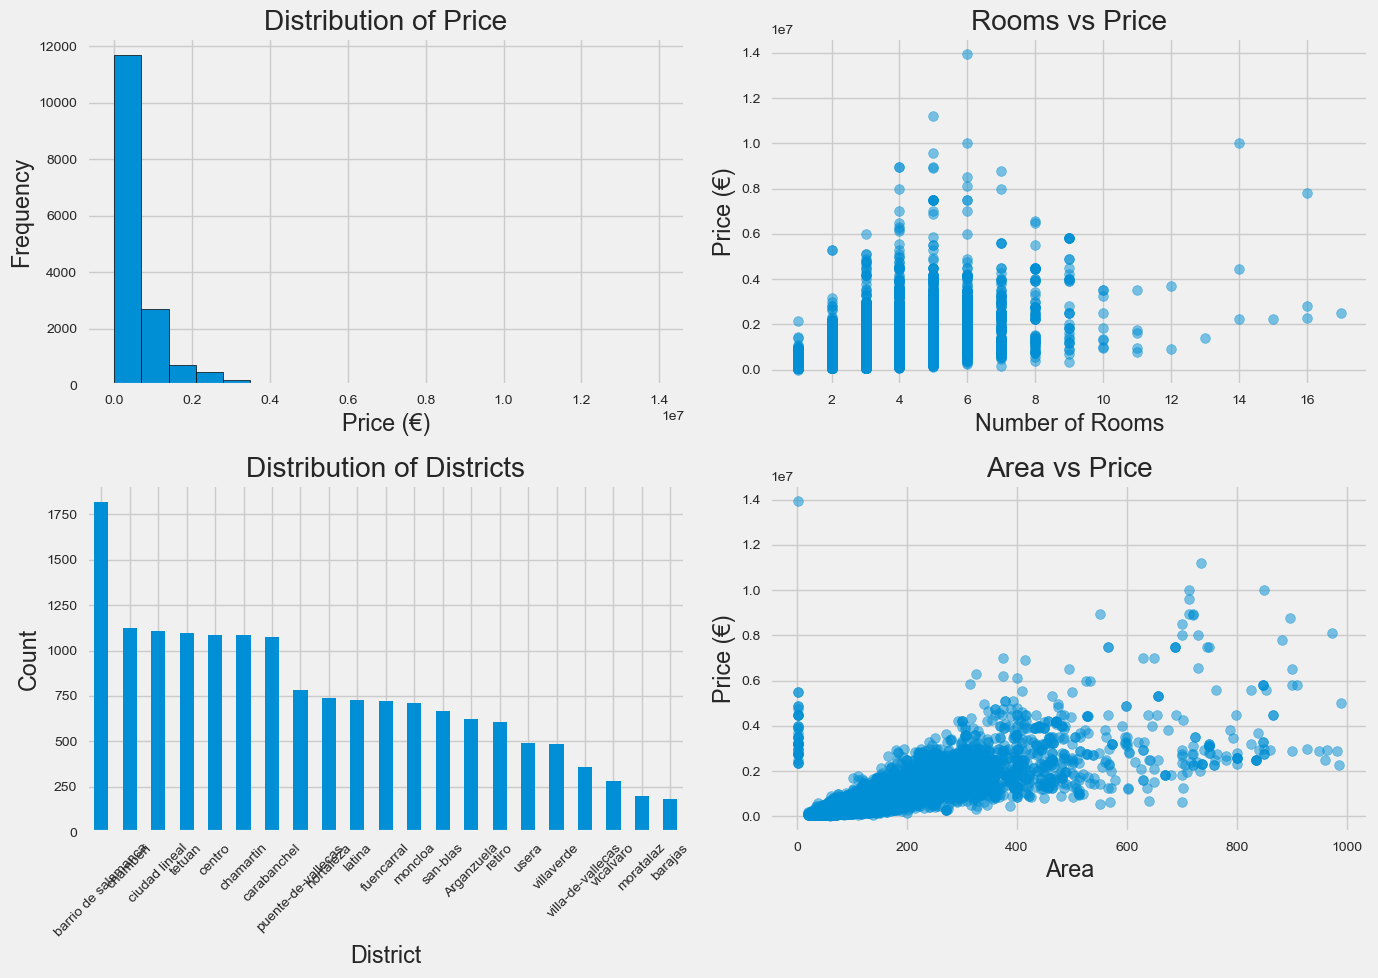

In [197]:
plt.figure(figsize=(14, 10))

# Histogram of 'price'
plt.subplot(2, 2, 1)
plt.hist(df['price'], bins=20, edgecolor='black')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

# Scatter plot of 'rooms' vs 'price'
plt.subplot(2, 2, 2)
plt.scatter(df['rooms'], df['price'], alpha=0.5)
plt.xlabel('Number of Rooms')
plt.ylabel('Price (€)')
plt.title('Rooms vs Price')

# Bar plot of 'district' counts
plt.subplot(2, 2, 3)
district_counts = df['district'].value_counts()
district_counts.plot(kind='bar')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Distribution of Districts')
plt.xticks(rotation=45)

# Scatter plot of 'area' vs 'price'
plt.subplot(2, 2, 4)
plt.scatter(df['m2'], df['price'], alpha=0.5)
plt.xlabel('Area')
plt.ylabel('Price (€)')
plt.title('Area vs Price')

plt.tight_layout()
plt.show()

In [246]:
# # Plotting box plots
# plt.figure(figsize=(18, 24))

# # Create box plots for each feature against the price
# features = ['house_type', 'rooms', 'm2', 'elevator', 'garage', 'neighborhood', 'district']
# for i, feature in enumerate(features, 1):
#     plt.subplot(len(features), 1, i)  # 1 plot per row
#     sns.boxplot(x=df[feature], y=df['price'])
#     plt.title(f'Price vs {feature}', fontsize=16)  # Add padding to the title
#     plt.xlabel(feature, fontsize=14)  # Add padding to the x-label
#     plt.ylabel('Price', fontsize=14)
#     plt.xticks(rotation=45, fontsize=12)
#     plt.yticks(fontsize=12)

# plt.tight_layout(pad=6.0)  # Increase padding between subplots
# plt.show()

In [198]:
from pycaret.regression import *

In [199]:
regression_setup = setup(
    data=df,
    target = 'price',
    session_id=1,
    )

,Description,Value
0,Session id,1
1,Target,price
2,Target type,Regression
3,Original data shape,"(15974, 8)"
4,Transformed data shape,"(15974, 28)"
5,Transformed train set shape,"(11181, 28)"
6,Transformed test set shape,"(4793, 28)"
7,Numeric features,4
8,Categorical features,3
9,Preprocess,True


In [200]:
# compare baseline models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,92179.9357,62819145649.0825,243648.1908,0.8952,0.2150,0.1699,0.2130
rf,Random Forest Regressor,98829.4406,68817420271.2158,256387.7986,0.8848,0.2192,0.1779,0.2590
lightgbm,Light Gradient Boosting Machine,112378.7458,70749021809.7960,260343.2612,0.8813,0.2444,0.2101,0.5200
gbr,Gradient Boosting Regressor,125644.7724,77001103060.8276,271904.6091,0.8707,0.2716,0.2421,0.0910
dt,Decision Tree Regressor,120297.6547,99753498189.2055,313071.8940,0.8304,0.2815,0.2089,0.0190
knn,K Neighbors Regressor,159086.3623,151902839209.6250,386278.9552,0.7426,0.3520,0.2943,0.0210
ridge,Ridge Regression,184727.2690,158704404231.2421,392394.3397,0.7331,0.6890,0.3809,0.0140
lar,Least Angle Regression,184748.4530,158703860241.3223,392393.8713,0.7331,0.6892,0.3810,0.0210
llar,Lasso Least Angle Regression,184745.5607,158704005640.2255,392394.0114,0.7331,0.6890,0.3809,0.0140
lasso,Lasso Regression,184745.4370,158703971488.2613,392393.9663,0.7331,0.6889,0.3809,0.0460


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 10063, number of used features: 27
[LightGBM] [Info] Start training from score 620852.902713
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 545
[LightGBM] [Info] Number of data points in the train set: 10063, number of 

In [132]:
# plot residuals
#plot_model(best_model, plot = 'residuals')

In [201]:
# predict on test set
holdout_pred = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,87969.8724,53202135171.8446,230655.8804,0.9136,0.2092,0.1465


In [202]:
# show predictions df
holdout_pred[['price','prediction_label']].head()

,price,prediction_label
10972,270000,294056.0
10063,160000,157599.5
6182,619000,861353.0
9819,149900,146509.6
13590,570000,339999.9


## Tuning

#### Tuning ET

In [203]:
# Setup environment and preprocess data
regression_setup = setup(data=df, target='price', session_id=1)

,Description,Value
0,Session id,1
1,Target,price
2,Target type,Regression
3,Original data shape,"(15974, 8)"
4,Transformed data shape,"(15974, 28)"
5,Transformed train set shape,"(11181, 28)"
6,Transformed test set shape,"(4793, 28)"
7,Numeric features,4
8,Categorical features,3
9,Preprocess,True


In [204]:
# Create Extra Trees Regressor model
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,90449.1289,48733355126.7765,220756.3252,0.9185,0.2080,0.1475
1,87749.6149,37155072355.2086,192756.5105,0.9270,0.2050,0.1468
2,84894.4566,39316718281.8815,198284.4378,0.9210,0.2035,0.1474
3,90563.5469,42006645587.5744,204955.2283,0.9241,0.2084,0.1483
4,89781.1711,52412695556.9206,228938.1916,0.9126,0.2074,0.1499
5,93346.1147,58732849938.0776,242348.6124,0.8749,0.2105,0.1514
6,102310.2451,167070374895.9726,408742.4310,0.7715,0.2195,0.1563
7,95141.4479,53639826134.9656,231602.7334,0.8915,0.2184,0.1609
8,98462.4212,66901836148.3001,258653.8926,0.8954,0.2669,0.3462


In [206]:
from sklearn.ensemble import ExtraTreesRegressor
# Tune hyperparameters of Extra Trees Regressor

et_params = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Tune hyperparameters of Extra Trees Regressor
tuned_et = tune_model(et, custom_grid=et_params, n_iter=110, optimize='R2', fold=17)



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,95871.4719,34080057966.5988,184607.8491,0.9363,0.2194,0.1733
1,108444.6519,75825072430.1092,275363.5278,0.9012,0.2138,0.1714
2,99946.5251,45130135422.8609,212438.5450,0.8895,0.2291,0.1825
3,88119.2230,29798413395.7593,172622.1695,0.9254,0.2173,0.1741
4,93267.3605,30875526258.5402,175714.3314,0.9354,0.2124,0.1728
5,117228.8330,93781732870.6186,306238.0330,0.8730,0.2228,0.1750
6,97580.6117,38409569583.9293,195983.5952,0.9056,0.2181,0.1701
7,102577.0261,59230381543.3784,243372.9269,0.9098,0.2255,0.1781
8,104249.0383,70975686293.8993,266412.6241,0.8718,0.2357,0.1832


Fitting 17 folds for each of 110 candidates, totalling 1870 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [93]:
# Evaluate tuned model performance
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [207]:
# predict on test set
holdout_pred = predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,87969.8724,53202135171.8446,230655.8804,0.9136,0.2092,0.1465


In [208]:
# show predictions df
holdout_pred[['price','prediction_label']].head()

,price,prediction_label
10972,270000,294056.0
10063,160000,157599.5
6182,619000,861353.0
9819,149900,146509.6
13590,570000,339999.9


### Tuning with stacked models


#### Tuned Stack Models

In [209]:
# Create and tune other models
rf = create_model('rf')
et = create_model('et')
lgbm  = create_model('lightgbm')

# Tune the models
tuned_rf = tune_model(rf, n_iter=20, optimize='R2', fold=5)
tuned_et = tune_model(et, n_iter=20, optimize='R2', fold=5)
tuned_lgbm = tune_model(lgbm, n_iter=20, optimize='R2', fold=5)

# Stack the models
stacked_model = stack_models(estimator_list=[tuned_lgbm, tuned_rf, tuned_et])

# Evaluate stacked model performance
evaluate_model(stacked_model)

# Predict on test set with stacked model
holdout_pred = predict_model(stacked_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,97875.7831,56990720713.7125,238727.2936,0.9047,0.2115,0.1571
1,94523.3695,40362555892.1317,200904.3451,0.9207,0.2114,0.1561
2,93342.5691,45741526938.0237,213872.6886,0.9081,0.2084,0.1566
3,101041.1573,63427966290.9382,251849.0943,0.8855,0.2143,0.1572
4,97548.1883,56668201976.2632,238050.8391,0.9055,0.2126,0.1597
5,96581.1351,63678412989.4686,252345.8202,0.8644,0.2123,0.1569
6,106050.3492,163880671248.0498,404821.7771,0.7758,0.2211,0.1640
7,97044.8211,46736247038.1476,216185.6772,0.9055,0.2220,0.1681
8,108830.1554,87684554214.8816,296115.7784,0.8629,0.2733,0.3521


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,90449.1289,48733355126.7765,220756.3252,0.9185,0.2080,0.1475
1,87749.6149,37155072355.2086,192756.5105,0.9270,0.2050,0.1468
2,84894.4566,39316718281.8815,198284.4378,0.9210,0.2035,0.1474
3,90563.5469,42006645587.5744,204955.2283,0.9241,0.2084,0.1483
4,89781.1711,52412695556.9206,228938.1916,0.9126,0.2074,0.1499
5,93346.1147,58732849938.0776,242348.6124,0.8749,0.2105,0.1514
6,102310.2451,167070374895.9726,408742.4310,0.7715,0.2195,0.1563
7,95141.4479,53639826134.9656,231602.7334,0.8915,0.2184,0.1609
8,98462.4212,66901836148.3001,258653.8926,0.8954,0.2669,0.3462


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,112526.1790,64787267912.9531,254533.4318,0.8916,0.2292,0.1846
1,108868.4694,48507215358.3548,220243.5365,0.9047,0.2365,0.1833
2,104105.3573,40057599015.2818,200143.9457,0.9195,0.2357,0.1846
3,116940.1594,58820587603.9074,242529.5603,0.8938,0.2679,0.1954
4,111982.6097,63651135359.7586,252291.7663,0.8938,0.2298,0.1846
5,110104.7722,61321064659.6408,247630.9041,0.8694,0.2391,0.1863
6,118771.2818,168128114967.8730,410034.2851,0.7700,0.2451,0.1895
7,114047.4013,57725117477.4167,240260.5200,0.8833,0.2481,0.2007
8,118200.2094,84046444357.3234,289907.6480,0.8686,0.2900,0.4141


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 10062, number of used features: 27
[LightGBM] [Info] Start training from score 625062.097694
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,129728.2863,67210165831.6271,259249.2350,0.8785,0.2978,0.2664
1,130878.3704,64132247587.9882,253243.4552,0.8781,0.2939,0.2614
2,136385.4379,81746982879.0582,285914.2929,0.8471,0.3095,0.2783
3,138473.6807,137972595721.7770,371446.6257,0.7749,0.3186,0.2872
4,141968.5835,118806181810.7250,344682.7263,0.8275,0.3276,0.4087
Mean,135486.8718,93973634766.2351,302907.2670,0.8412,0.3095,0.3004
Std,4607.3990,29355907863.2907,47125.6020,0.0384,0.0126,0.0549


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,155612.7810,106615517726.8463,326520.3175,0.8073,0.3265,0.2689
1,151650.4987,91807448956.1636,302997.4405,0.8255,0.3195,0.2616
2,152132.2182,109735543617.9592,331263.5561,0.7948,0.3330,0.2782
3,161706.0911,171366582046.9524,413964.4695,0.7204,0.3405,0.2898
4,162645.8954,129758335496.3747,360219.8433,0.8116,0.3520,0.4119
Mean,156749.4969,121856685568.8592,346993.1254,0.7919,0.3343,0.3021
Std,4646.4289,27552995558.5107,38111.1073,0.0371,0.0113,0.0557


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,111977.7095,59137473329.4203,243181.9757,0.8931,0.2526,0.1866
1,112287.1305,51694614079.3863,227364.4961,0.9018,0.2766,0.1918
2,109822.4484,57787212423.2434,240389.7095,0.8919,0.2734,0.1896
3,119026.9308,105870485951.3121,325377.4515,0.8272,0.2571,0.1993
4,116234.2587,81151063060.5698,284870.2565,0.8821,0.2692,0.2791
Mean,113869.6956,71128169768.7864,264236.7779,0.8792,0.2658,0.2093
Std,3306.1327,20034509998.4736,36153.7687,0.0267,0.0093,0.0352


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002776 seconds.
You can set `force_row_wise=true` to remove the overhead

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,93857.4715,49844427073.7632,223258.6551,0.9166,0.2063,0.1482
1,91759.5614,37355106782.2448,193274.6926,0.9266,0.2067,0.1511
2,86994.8241,37812067324.9540,194453.2523,0.9241,0.1972,0.1474
3,95132.9343,47295638664.2516,217475.6048,0.9146,0.2076,0.1531
4,92767.5769,50609698461.7957,224965.9940,0.9156,0.2068,0.1527
5,92508.7254,56070481954.5728,236792.0648,0.8806,0.2040,0.1488
6,102435.8086,155912722174.3268,394857.8506,0.7867,0.2104,0.1528
7,94777.8503,47297149450.7619,217479.0782,0.9044,0.2151,0.1626
8,101820.4049,67414311375.6056,259642.6609,0.8946,0.2632,0.3394


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,88684.3067,52079118697.3925,228208.4983,0.9155,0.2039,0.1455


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [210]:
# show predictions df
holdout_pred[['price','prediction_label']].head()

,price,prediction_label
10972,270000,308432.083967
10063,160000,159689.867995
6182,619000,813316.729635
9819,149900,144091.028898
13590,570000,334320.611024


#### untuned Stack models

In [214]:
# Create and tune other models
rf = create_model('rf')
et = create_model('et')
lgbm  = create_model('lightgbm')

# Stack the models
untuned_stacked_model = stack_models(estimator_list=[et, lgbm, rf, et])

# Evaluate stacked model performance
evaluate_model(untuned_stacked_model)

# Predict on test set with stacked model
holdout_pred = predict_model(untuned_stacked_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,97875.7831,56990720713.7125,238727.2936,0.9047,0.2115,0.1571
1,94523.3695,40362555892.1317,200904.3451,0.9207,0.2114,0.1561
2,93342.5691,45741526938.0237,213872.6886,0.9081,0.2084,0.1566
3,101041.1573,63427966290.9382,251849.0943,0.8855,0.2143,0.1572
4,97548.1883,56668201976.2632,238050.8391,0.9055,0.2126,0.1597
5,96581.1351,63678412989.4686,252345.8202,0.8644,0.2123,0.1569
6,106050.3492,163880671248.0498,404821.7771,0.7758,0.2211,0.1640
7,97044.8211,46736247038.1476,216185.6772,0.9055,0.2220,0.1681
8,108830.1554,87684554214.8816,296115.7784,0.8629,0.2733,0.3521


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,90449.1289,48733355126.7765,220756.3252,0.9185,0.2080,0.1475
1,87749.6149,37155072355.2086,192756.5105,0.9270,0.2050,0.1468
2,84894.4566,39316718281.8815,198284.4378,0.9210,0.2035,0.1474
3,90563.5469,42006645587.5744,204955.2283,0.9241,0.2084,0.1483
4,89781.1711,52412695556.9206,228938.1916,0.9126,0.2074,0.1499
5,93346.1147,58732849938.0776,242348.6124,0.8749,0.2105,0.1514
6,102310.2451,167070374895.9726,408742.4310,0.7715,0.2195,0.1563
7,95141.4479,53639826134.9656,231602.7334,0.8915,0.2184,0.1609
8,98462.4212,66901836148.3001,258653.8926,0.8954,0.2669,0.3462


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,112526.1790,64787267912.9531,254533.4318,0.8916,0.2292,0.1846
1,108868.4694,48507215358.3548,220243.5365,0.9047,0.2365,0.1833
2,104105.3573,40057599015.2818,200143.9457,0.9195,0.2357,0.1846
3,116940.1594,58820587603.9074,242529.5603,0.8938,0.2679,0.1954
4,111982.6097,63651135359.7586,252291.7663,0.8938,0.2298,0.1846
5,110104.7722,61321064659.6408,247630.9041,0.8694,0.2391,0.1863
6,118771.2818,168128114967.8730,410034.2851,0.7700,0.2451,0.1895
7,114047.4013,57725117477.4167,240260.5200,0.8833,0.2481,0.2007
8,118200.2094,84046444357.3234,289907.6480,0.8686,0.2900,0.4141


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,96072.2722,50477021724.5427,224670.9187,0.9156,0.2022,0.1519
1,92297.3760,36737262474.2451,191669.6702,0.9278,0.2036,0.1523
2,88703.6343,37208093597.1575,192893.9958,0.9253,0.2004,0.1514
3,97065.2912,47086231967.5694,216993.6220,0.9150,0.2126,0.1577
4,94412.1390,52209650906.5650,228494.3126,0.9129,0.2027,0.1512
5,95068.4694,57193280228.7856,239151.1661,0.8782,0.2147,0.1534
6,105352.4510,163168819094.0338,403941.6036,0.7768,0.2141,0.1580
7,97262.9483,48933444076.7394,221209.0506,0.9010,0.2181,0.1656
8,104075.9381,71250253045.3542,266927.4303,0.8886,0.2658,0.3541


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,90490.0259,53455352142.6544,231204.1352,0.9132,0.2038,0.1481


In [213]:
# show predictions df
holdout_pred[['price','prediction_label']].head()

,price,prediction_label
10972,270000,326081.335651
10063,160000,157678.869173
6182,619000,819777.037174
9819,149900,141914.962948
13590,570000,346326.988561


### Ensemble Model

In [217]:
# ensemble with bagging
ensemble_model(et, method = 'Bagging', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,95336.5774,50783780259.2746,225352.5688,0.9151,0.2048,0.1524
1,90535.4366,36507770309.8262,191070.0665,0.9283,0.2045,0.1525
2,88065.8388,38463383718.9567,196120.8396,0.9227,0.2025,0.1528
3,95390.4169,43146532607.1120,207717.4345,0.9221,0.2073,0.1541
4,95994.4155,57421674659.8804,239628.2009,0.9042,0.2086,0.1558
5,94562.9177,59470962463.4702,243866.6899,0.8733,0.2078,0.1541
6,105789.0085,171310404614.1974,413896.6110,0.7657,0.2176,0.1603
7,95797.2713,50145781049.2990,223932.5368,0.8986,0.2155,0.1632
8,101039.0147,64516396631.5949,254000.7808,0.8991,0.2644,0.3481


Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


ExtraTreesRegressor(n_jobs=-1, random_state=1)

In [220]:
# ensemble with boosting
ensemble_model(et, method = 'Boosting', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,89517.8889,48013110560.2939,219118.9416,0.9197,0.2042,0.1481
1,87287.9997,37435708455.7499,193483.0960,0.9264,0.2021,0.1458
2,86809.4586,40866985357.0665,202155.8442,0.9179,0.2033,0.1493
3,92515.8507,44573596310.7766,211124.5990,0.9195,0.2080,0.1510
4,91670.9148,54695653994.2847,233871.0200,0.9087,0.2096,0.1530
5,93601.2990,58484296716.2059,241835.2677,0.8755,0.2101,0.1518
6,104468.2314,168899832639.3639,410974.2481,0.7690,0.2188,0.1580
7,93532.2751,48488008628.6307,220199.9288,0.9019,0.2153,0.1603
8,98142.3538,65403806577.7244,255741.6794,0.8977,0.2646,0.3363


Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


ExtraTreesRegressor(n_jobs=-1, random_state=1)

In [221]:
# ensemble with bagging
ensemble_model(rf, method = 'Bagging', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,103038.6619,60186776360.9985,245329.9337,0.8993,0.2147,0.1637
1,98178.4337,40362166076.6236,200903.3750,0.9207,0.2144,0.1637
2,95683.7733,43743088156.0853,209148.4835,0.9121,0.2119,0.1638
3,103408.1099,56557763342.1149,237818.7615,0.8979,0.2148,0.1625
4,101799.7512,61942859333.1184,248883.2243,0.8967,0.2161,0.1652
5,98245.9591,62607638804.7684,250215.1850,0.8667,0.2135,0.1617
6,109193.4397,171570245870.6550,414210.3884,0.7653,0.2264,0.1707
7,102678.9578,51783419394.2546,227559.7051,0.8953,0.2251,0.1746
8,111407.1822,83278285551.8590,288579.7733,0.8698,0.2732,0.3653


Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


RandomForestRegressor(n_jobs=-1, random_state=1)

In [222]:
# ensemble with boosting
ensemble_model(rf, method = 'Boosting', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,96800.3290,56396258463.1395,237478.9643,0.9057,0.2099,0.1584
1,92621.6339,39182463579.9027,197945.6076,0.9230,0.2110,0.1579
2,90990.6961,38594093154.7938,196453.7939,0.9225,0.2092,0.1581
3,98527.8958,54414719367.4000,233269.6280,0.9017,0.2122,0.1580
4,94953.0651,55498948602.4555,235582.1483,0.9074,0.2118,0.1595
5,95358.8097,59783540409.0742,244506.7288,0.8727,0.2108,0.1573
6,106837.8417,167197017071.6722,408897.3185,0.7713,0.2250,0.1674
7,95820.4487,44557907092.2189,211087.4394,0.9099,0.2218,0.1700
8,104402.0018,85544923592.1514,292480.6380,0.8662,0.2706,0.3571


AdaBoostRegressor(estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
                  n_estimators=10, random_state=1)

### Bend Models

In [223]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,92179.9357,62819145649.0825,243648.1908,0.8952,0.2150,0.1699,0.2490
rf,Random Forest Regressor,98829.4406,68817420271.2158,256387.7986,0.8848,0.2192,0.1779,0.2820
lightgbm,Light Gradient Boosting Machine,112378.7458,70749021809.7960,260343.2612,0.8813,0.2444,0.2101,0.5170
dt,Decision Tree Regressor,120297.6547,99753498189.2055,313071.8940,0.8304,0.2815,0.2089,0.0190
gbr,Gradient Boosting Regressor,125644.7724,77001103060.8276,271904.6091,0.8707,0.2716,0.2421,0.0930
knn,K Neighbors Regressor,159086.3623,151902839209.6250,386278.9552,0.7426,0.3520,0.2943,0.0210
br,Bayesian Ridge,184117.3592,158771452956.0800,392475.6020,0.7330,0.6970,0.3778,0.0180
en,Elastic Net,184455.6994,162451238203.4684,397255.1980,0.7266,0.6353,0.3673,0.0220
ridge,Ridge Regression,184727.2690,158704404231.2421,392394.3397,0.7331,0.6890,0.3809,0.0180
lasso,Lasso Regression,184745.4370,158703971488.2613,392393.9663,0.7331,0.6889,0.3809,0.0470


In [224]:
best_mae_models_top3

[ExtraTreesRegressor(n_jobs=-1, random_state=1),
 RandomForestRegressor(n_jobs=-1, random_state=1),
 LGBMRegressor(n_jobs=-1, random_state=1)]

In [225]:
best_mse_models_top3 = compare_models(sort = 'MSE', n_select = 3)
best_mse_models_top3

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,92179.9357,62819145649.0825,243648.1908,0.8952,0.2150,0.1699,0.2270
rf,Random Forest Regressor,98829.4406,68817420271.2158,256387.7986,0.8848,0.2192,0.1779,0.2590
lightgbm,Light Gradient Boosting Machine,112378.7458,70749021809.7960,260343.2612,0.8813,0.2444,0.2101,0.4920
gbr,Gradient Boosting Regressor,125644.7724,77001103060.8276,271904.6091,0.8707,0.2716,0.2421,0.0900
dt,Decision Tree Regressor,120297.6547,99753498189.2055,313071.8940,0.8304,0.2815,0.2089,0.0190
knn,K Neighbors Regressor,159086.3623,151902839209.6250,386278.9552,0.7426,0.3520,0.2943,0.0220
lar,Least Angle Regression,184748.4530,158703860241.3223,392393.8713,0.7331,0.6892,0.3810,0.0170
lr,Linear Regression,184748.4530,158703860241.3456,392393.8713,0.7331,0.6892,0.3810,0.0180
lasso,Lasso Regression,184745.4370,158703971488.2613,392393.9663,0.7331,0.6889,0.3809,0.0500
llar,Lasso Least Angle Regression,184745.5607,158704005640.2255,392394.0114,0.7331,0.6890,0.3809,0.0180


[ExtraTreesRegressor(n_jobs=-1, random_state=1),
 RandomForestRegressor(n_jobs=-1, random_state=1),
 LGBMRegressor(n_jobs=-1, random_state=1)]

In [226]:
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,96578.7096,51599008008.2184,227154.1503,0.9137,0.2031,0.1556
1,92574.0663,37056353917.9808,192500.2699,0.9272,0.2032,0.1543
2,90026.5544,38030895029.7340,195015.1149,0.9236,0.2018,0.1554
3,98569.3266,49691827201.0469,222916.6373,0.9103,0.2125,0.1602
4,95568.0100,53487354949.0677,231273.3338,0.9108,0.2049,0.1561
5,95613.5040,57849669148.2037,240519.5816,0.8768,0.2112,0.1580
6,105889.6609,163031563710.4043,403771.6727,0.7770,0.2165,0.1622
7,97721.1873,47369599718.8202,217645.5828,0.9042,0.2193,0.1688
8,104624.7006,73925267310.5687,271892.0141,0.8844,0.2664,0.3635


VotingRegressor(estimators=[('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=1)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1, random_state=1)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=1))],
                n_jobs=-1)

In [227]:
blend_models(best_mse_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,96578.7096,51599008008.2184,227154.1503,0.9137,0.2031,0.1556
1,92574.0663,37056353917.9808,192500.2699,0.9272,0.2032,0.1543
2,90026.5544,38030895029.7340,195015.1149,0.9236,0.2018,0.1554
3,98569.3266,49691827201.0469,222916.6373,0.9103,0.2125,0.1602
4,95568.0100,53487354949.0677,231273.3338,0.9108,0.2049,0.1561
5,95613.5040,57849669148.2037,240519.5816,0.8768,0.2112,0.1580
6,105889.6609,163031563710.4043,403771.6727,0.7770,0.2165,0.1622
7,97721.1873,47369599718.8202,217645.5828,0.9042,0.2193,0.1688
8,104624.7006,73925267310.5687,271892.0141,0.8844,0.2664,0.3635


VotingRegressor(estimators=[('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=1)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1, random_state=1)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=1))],
                n_jobs=-1)